# Importing Necessary Libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import math
import sweetviz as sv
import os
from sklearn.preprocessing import LabelEncoder
import shap
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Display Settings for max rows and columns in the dataset with ignored warnings.

In [2]:
pd.set_option('mode.chained_assignment', None)  #default='warn'
pd.set_option('display.max_rows', 200) #if df has more than 200 values in its record pd will truncate(shorten the display) the display.
pd.set_option('display.max_columns', 150) #if df has more than 150 columns pd will truncate the display.

# Reading the DataSet

In [3]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv',low_memory=False) #entire file is read into the memeory at once

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,...,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,...,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df.shape

(2260701, 151)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


# Response Variable

In [7]:
df.groupby('loan_status').size() #counts the occurence of each unique value in the loan_status column

loan_status
Charged Off                                             268559
Current                                                 878317
Default                                                     40
Does not meet the credit policy. Status:Charged Off        761
Does not meet the credit policy. Status:Fully Paid        1988
Fully Paid                                             1076751
In Grace Period                                           8436
Late (16-30 days)                                         4349
Late (31-120 days)                                       21467
dtype: int64

# Considering only Fully Paid, Charged off & Default loans.

In [8]:
target = ['Current']
loan_main = df.loc[~df['loan_status'].isin(target)].copy()
loan_main['loan_status'] = np.where(loan_main['loan_status'].str.contains('Fully'), 0, 1)

In [9]:
loan_main.shape

(1382384, 151)

In [10]:
loan_main.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,...,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,...,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# 90 Days Worse Rating

In [11]:
def calculate_90day_worse_rating(loan_status):
    # Check if the loan status indicates delinquency or default for 90 or more days
    if loan_status in ['Charged Off', 'Default', 'Late (91-120 days)']:
        return 1
    else:
        return 0

df['90day_worse_rating'] = df['loan_status'].apply(calculate_90day_worse_rating)

print(df[['loan_status', '90day_worse_rating']])

         loan_status  90day_worse_rating
0         Fully Paid                   0
1         Fully Paid                   0
2         Fully Paid                   0
3            Current                   0
4         Fully Paid                   0
...              ...                 ...
2260696      Current                   0
2260697  Charged Off                   1
2260698      Current                   0
2260699          NaN                   0
2260700          NaN                   0

[2260701 rows x 2 columns]


# Converting employee_length to numerical.

In [12]:
loan_main['emp_length'] = loan_main['emp_length'].fillna('< 1 year').replace({'10+ years': 10, '6 years': 6, '4 years': 4, '< 1 year': 0.5, '2 years': 2, '9 years': 9, '5 years': 5, '3 years': 3, '7 years': 7, '1 year': 1, '8 years': 8})

# Segregating the loan_main dataset into two based on the Application_Type (Individual / Joint Type)

In [13]:
individual_loan = loan_main[loan_main['application_type'] == 'Individual']
joint_loan = loan_main[loan_main['application_type'] == 'Joint App']

In [14]:
individual_loan.shape , joint_loan.shape

((1352767, 151), (29584, 151))

# Converting the purpose column into numerical using LabelEncoder.

In [15]:
encoder = LabelEncoder()
individual_loan['purpose'] = encoder.fit_transform(individual_loan['purpose'])

In [16]:
individual_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10.0,MORTGAGE,55000.0,Not Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,2,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,...,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10.0,MORTGAGE,65000.0,Not Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,11,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,...,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Loan issued over time.

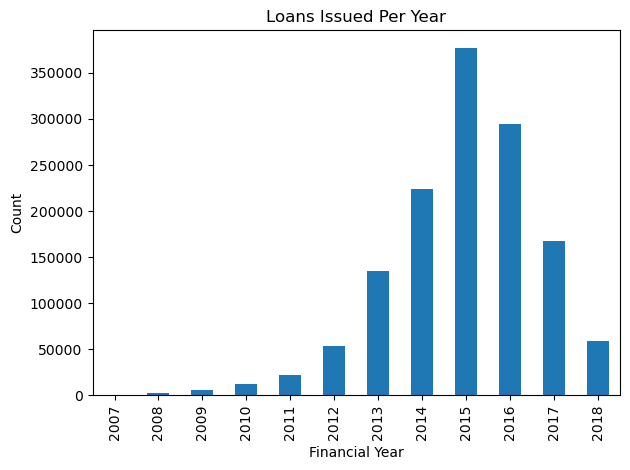

In [17]:
individual_loan['issue_d'] = pd.to_datetime(individual_loan['issue_d'])

yearly_counts = individual_loan['issue_d'].dt.year.value_counts().sort_index()
yearly_counts.plot(kind='bar')

plt.title('Loans Issued Per Year')
plt.xlabel('Financial Year')
plt.ylabel('Count')
plt.tight_layout()

plt.show()


# Creating the Train & Test data.

In [18]:
# Set Fraction
frac = 0.85 #Considering only 85% of the data from individual_loan.

# Get Fractions
df_train = individual_loan[individual_loan['issue_d'] < individual_loan['issue_d'].quantile(frac)].copy()
df_test = individual_loan[individual_loan['issue_d'] >= individual_loan['issue_d'].quantile(frac)].copy()

# Deep Copy in a zip file.

In [19]:
#Saving as compressed zip files to save space.
df_test.to_csv("/Users/rolex/Desktop/IGP/Project/Data/df_test.csv.zip")
df_train.to_csv("/Users/rolex/Desktop/IGP/Project/Data/df_train.csv.zip")

In [20]:
df_train.shape , df_test.shape

((1143145, 151), (209622, 151))

# Get Directory

In [21]:
df_train_path = os.path.join('/Users/rolex/Desktop/IGP/Project/Data' , 'df_train.csv.zip')
df_test_path = os.path.join('/Users/rolex/Desktop/IGP/Project/Data' , 'df_test.csv.zip')

df = pd.read_csv(df_train_path , low_memory = False) #entire file is read into the memeory at once
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10.0,MORTGAGE,55000.0,Not Verified,2015-12-01,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,2,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,...,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10.0,MORTGAGE,65000.0,Not Verified,2015-12-01,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,11,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,...,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [22]:
df.shape

(1143145, 152)

# Drop Leak Columns

In [23]:
column_drop = [
    'acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
    'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 
    'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'funded_amnt', 
    'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d', 'initial_list_status', 
    'mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct', 'last_pymnt_amnt', 'last_pymnt_d', 
    'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 
    'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 
    'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 
    'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'out_prncp', 
    'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 'tax_liens', 
    'tot_coll_amt', 'tot_cur_bal', 'last_fico_range_high', 'last_fico_range_low', 'url', 'id', 'title', 
    'addr_state', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 
    'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 
    'total_rev_hi_lim', 'Unnamed: 0'
] # List of columns to drop

# Drop columns
df_drop = df.drop(columns=column_drop)
dropped_columns_count = len(column_drop)

print("After Dropping, the new DataFrame contains {} features and lost a total of {} features".format(df_drop.shape[1], dropped_columns_count))


After Dropping, the new DataFrame contains 86 features and lost a total of 66 features


In [24]:
df_drop.shape

(1143145, 86)

# Removing features that contains value == 1

In [25]:
# Finding unique values in each feature
nunique_value = df_drop.nunique()

# Finding columns with only one unique value
single_value_cols = nunique_value[nunique_value == 1].index.tolist()

print(single_value_cols)

['policy_code', 'application_type', 'hardship_type', 'deferral_term', 'hardship_length']


In [26]:
# Drop columns with only one unique value
df_drop = df_drop.drop(columns = single_value_cols)

In [27]:
df_drop.shape

(1143145, 81)

# Creating a DataFrame to record the missing mean.

In [28]:
# Calculate mean of NaN values in each column
mean_nan_df = pd.DataFrame({'mean_nan': df_drop.isna().mean(), 'dtypes': df_drop.dtypes})

# Sorted DataFrame by mean_nan values in descending order
mean_nan_df = mean_nan_df.sort_values(by='mean_nan', ascending=False).reset_index()

mean_nan_df.head()

,index,mean_nan,dtypes
0,member_id,1.0,float64
1,revol_bal_joint,1.0,float64
2,verification_status_joint,1.0,float64
3,dti_joint,1.0,float64
4,annual_inc_joint,1.0,float64


# Dropping features that contains missing data.

In [29]:
# Calculate percentage of missing values for each column
missing_data = df_drop.isnull().sum() / len(df_drop) * 100

# Filter columns with missing values less than 50%
missing_variable = missing_data[missing_data < 50].index.tolist()

# Columns with missing values more than 50%
drop_columns = list(set(df_drop.columns) - set(missing_variable))

# Drop columns based on missing data more than 50%
df_drop_nan = df_drop.drop(columns=drop_columns)

df_drop_nan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10.0,MORTGAGE,55000.0,Not Verified,2015-12-01,0,2,190xx,5.91,Aug-2003,675.0,679.0,7.0,0.0,2765.0,29.7,13.0,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10.0,MORTGAGE,65000.0,Not Verified,2015-12-01,0,11,577xx,16.06,Dec-1999,715.0,719.0,22.0,0.0,21470.0,19.2,38.0,4.0,0.0
2,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3.0,MORTGAGE,104433.0,Source Verified,2015-12-01,0,6,174xx,25.37,Jun-1998,695.0,699.0,12.0,0.0,21929.0,64.5,35.0,6.0,0.0
3,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4.0,RENT,34000.0,Source Verified,2015-12-01,0,2,300xx,10.20,Oct-1987,690.0,694.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0
4,20000.0,36 months,9.17,637.58,B,B2,Vice President of Recruiting Operations,10.0,MORTGAGE,180000.0,Not Verified,2015-12-01,0,2,550xx,14.67,Jun-1990,680.0,684.0,12.0,0.0,87329.0,84.5,27.0,4.0,0.0


In [30]:
df_drop_nan.shape

(1143145, 26)

In [31]:
# Calculate percentage of missing values for each column and sort the values
missing_data = df_drop_nan.isnull().mean() * 100
missing_data = missing_data.sort_values()

missing_data

loan_amnt               0.000000
revol_bal               0.000000
fico_range_high         0.000000
fico_range_low          0.000000
dti                     0.000000
purpose                 0.000000
issue_d                 0.000000
verification_status     0.000000
loan_status             0.000000
installment             0.000000
emp_length              0.000000
term                    0.000000
int_rate                0.000000
sub_grade               0.000000
grade                   0.000000
home_ownership          0.000000
zip_code                0.000087
annual_inc              0.000350
open_acc                0.002537
pub_rec                 0.002537
total_acc               0.002537
earliest_cr_line        0.002537
revol_util              0.059485
pub_rec_bankruptcies    0.119407
mort_acc                4.376523
emp_title               6.072895
dtype: float64

# Custom Summary to convert categorical features into numerical ones.

In [32]:
#This function will be applied on the testing data, to get the exact kind of transformation
def convert_object_to_numeric(df_catg):
    
    #A deep copy of the DataFrame
    numerical_df = df_catg.copy()
    
    #List to keep track of columns to drop at the end
    drop_columns = ['emp_title']
    
    #Handling missing values in 'mort_acc' column
    numerical_df['mort_acc'] = np.where(numerical_df['mort_acc'].isnull(), 0, numerical_df['mort_acc'])
    
    #Convert 'pub_rec_bankruptcies' and 'pub_rec' features to binary
    numerical_df['pub_rec_bankruptcies'] = np.where(numerical_df['pub_rec_bankruptcies'] > 0, 1, 0)
    numerical_df['pub_rec'] = np.where(numerical_df['pub_rec'] > 0, 1, 0)
    
    #Dictionaries for mapping categorical values to numerical ones
    term_map = {' 36 months' : 1, ' 60 months' : 2}
    grade_map = dict(zip(['A', 'B', 'C', 'D', 'E', 'F', 'G'], np.arange(7, 0, -1)))
    sub_grade_map = {'G5':0, 'G4':1, 'G3':2, 'G2':3, 'G1':4,
                       'F5':5, 'F4':6, 'F3':7, 'F2':8, 'F1':9,
                       'E5':10, 'E4':11, 'E3':12, 'E2':13, 'E1':14,
                       'D5':15, 'D4':16, 'D3':17, 'D2':18, 'D1':19,
                       'C5':20, 'C4':21, 'C3':22, 'C2':23, 'C1':24,
                       'B5':25, 'B4':26, 'B3':27, 'B2':28, 'B1':29,
                       'A5':30, 'A4':31, 'A3':32, 'A2':33, 'A1':34}
    home_map = {'MORTGAGE':4, 'RENT':3, 'OWN':5, 'ANY':2, 'OTHER':1, 'NONE':0}
    ver_status_map = {'Source Verified': 2, 'Verified': 1, 'Not Verified': 0}
    
    #Replaced categorical values with numerical values
    numerical_df.replace({'term': term_map, 'grade': grade_map, 'sub_grade': sub_grade_map,
                   'home_ownership': home_map, 'verification_status': ver_status_map}, inplace = True)
    
    #Extracting first 3 digits of zip code
    numerical_df['zip_3'] = numerical_df['zip_code'].str.replace('x', '').str[:3]
    numerical_df['zip_2'] = numerical_df['zip_3'].str[:2]
    drop_columns.append('zip_code')
    
    #Drop rows with missing values
    numerical_df = numerical_df.dropna(axis = 0)
    
    #Convert date columns to datetime & create new feature 'cred_history'(RFE)
    numerical_df['earliest_cr_line'] = pd.to_datetime(numerical_df['earliest_cr_line'], infer_datetime_format = True)
    numerical_df['issue_d'] = pd.to_datetime(numerical_df['issue_d'], infer_datetime_format = True)
    credit_history = numerical_df['issue_d'] - numerical_df['earliest_cr_line']
    numerical_df['credit_history'] = credit_history.dt.days
    drop_columns.extend(['earliest_cr_line', 'issue_d'])
    
    #RFE 'credit_line_ratio' & 'balance_annual_income'
    numerical_df['credit_line_ratio'] = numerical_df['open_acc'] / numerical_df['total_acc']
    numerical_df['balance_annual_income'] = numerical_df['loan_amnt'] / numerical_df['annual_inc']
    drop_columns.extend(['open_acc', 'total_acc'])
    
    #Log transform 'annual_inc'
    numerical_df['annual_inc'] += 1
    numerical_df['annual_inc'] = np.log(numerical_df['annual_inc'])
    
    #RFE 'fico_avg_score'
    numerical_df['fico_avg_score'] = (numerical_df['fico_range_high'] + numerical_df['fico_range_low']) / 2
    drop_columns.extend(['fico_range_high', 'fico_range_low'])
    
    #RFE 'installment_amnt_ratio'
    numerical_df['installment_amnt_ratio'] = numerical_df['installment'] / numerical_df['loan_amnt']
    drop_columns.extend(['installment' , 'loan_amnt'])
    
    #Extracting first 3 digits of zip code again
    numerical_df['zip_3'] = numerical_df['zip_code'].str.replace('x', '').str[:3]
    numerical_df['zip_2'] = numerical_df['zip_3'].str[:2]
    drop_columns.append('zip_code')
    
    #Drop features listed in col_drop_list
    numerical_df = numerical_df.drop(columns = drop_columns)
    
    return numerical_df

### Converting categorical features to numerical by applying the custom function

In [33]:
numerical_df = convert_object_to_numeric(df_drop_nan)
numerical_df.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,zip_3,zip_2,credit_history,credit_line_ratio,balance_annual_income,fico_avg_score,installment_amnt_ratio
0,1,13.99,5,21,10.0,4,10.915107,0,0,2,5.91,0,2765.0,29.7,1.0,0,190,19,4505,0.538462,0.065455,677.0,0.034175
1,1,11.99,5,24,10.0,4,11.082158,0,0,11,16.06,0,21470.0,19.2,4.0,0,577,57,5844,0.578947,0.380000,717.0,0.033210
2,2,22.45,2,9,3.0,4,11.556311,2,0,6,25.37,0,21929.0,64.5,6.0,0,174,17,6392,0.342857,0.099585,697.0,0.027876
3,1,13.44,5,22,4.0,3,10.434145,2,0,2,10.20,0,8822.0,68.4,0.0,0,300,30,10288,0.833333,0.351471,692.0,0.033906
4,1,9.17,6,28,10.0,4,12.100718,0,0,2,14.67,0,87329.0,84.5,4.0,0,550,55,9314,0.444444,0.111111,682.0,0.031879


### Groupby operation

In [34]:
# Columns to be dropped
columns_to_drop = ['zip_3']

#Dropping specified columns & then performing the groupby operation
df_macro_groupby = numerical_df.drop(columns = columns_to_drop).groupby(by = 'zip_2')

In [35]:
scaled_columns = ['term', 'int_rate', 'grade', 'sub_grade', 'emp_length','home_ownership', 'annual_inc', 'verification_status','purpose', 'dti',
            'revol_bal','revol_util', 'mort_acc','credit_hist', 'credit_line_ratio', 'balance_annual_inc','fico_avg_score','inst_amnt_ratio']

### Eliminate binary feature & calculate the mean for these features.

In [36]:
# Filter columns based on their data types
numeric_columns = df_macro_groupby.mean().select_dtypes(include = np.number).columns

#Get mean & eliminate binary features
df_macro_mean = df_macro_groupby.mean()[numeric_columns]
df_macro_mean.drop(columns=['pub_rec', 'loan_status','pub_rec_bankruptcies'], inplace=True)
df_macro_mean.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,revol_bal,revol_util,mort_acc,credit_history,credit_line_ratio,balance_annual_income,fico_avg_score,installment_amnt_ratio
zip_2,,,,,,,,,,,,,,,,,,
00,1.181818,13.018182,5.272727,23.363636,7.181818,3.818182,11.088423,0.818182,2.454545,20.370909,14340.181818,51.227273,1.000000,5600.454545,0.487693,0.215835,697.000000,0.031794
01,1.269559,12.645396,5.374430,23.970713,6.095039,3.702066,11.168798,1.089521,2.495312,17.142621,18712.639260,52.937908,1.719655,5950.253962,0.504081,0.217296,700.473492,0.030637
02,1.244207,12.695069,5.368768,23.903914,5.834292,3.565239,11.151513,1.075931,2.489643,16.728669,18146.955335,53.652513,1.386131,5749.092010,0.512496,0.211037,698.983139,0.030935
03,1.242176,12.760563,5.352099,23.822710,6.221374,3.741412,11.122337,1.040267,2.502863,18.650784,17877.933015,54.487805,1.842366,5967.987405,0.488050,0.209294,699.160401,0.030986
04,1.221943,12.412429,5.386935,24.010888,6.159966,3.854271,11.000826,1.118928,2.345896,19.609414,16172.835846,54.219095,1.847571,6175.922948,0.485198,0.232221,696.849246,0.031061


In [37]:
#Save statistical copy for later use
df_macro_mean.to_csv("/Users/rolex/Desktop/IGP/Project/Data/df_macro_mean.csv")

### Eliminate binary feature & calculate STD for these features.

In [38]:
#Filter columns based on their datatypes
numeric_columns_std = df_macro_groupby.std().select_dtypes(include = np.number).columns

#Get STD & eliminate binary features
df_macro_std = df_macro_groupby.std()[numeric_columns_std]
df_macro_std.drop(columns=['pub_rec', 'loan_status','pub_rec_bankruptcies'], inplace=True)
df_macro_std.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,revol_bal,revol_util,mort_acc,credit_history,credit_line_ratio,balance_annual_income,fico_avg_score,installment_amnt_ratio
zip_2,,,,,,,,,,,,,,,,,,
00,0.404520,5.032591,1.420627,6.874194,3.092513,0.603023,0.461202,0.750757,2.381749,12.408343,5844.465413,20.831567,1.264911,2486.885175,0.156975,0.106464,22.472205,0.003864
01,0.443749,4.650108,1.314324,6.556430,3.599464,0.622959,0.498040,0.842590,2.135491,7.861925,24419.824656,24.148594,2.065026,2643.734784,0.168556,0.103749,32.971923,0.004286
02,0.429628,4.619841,1.309402,6.527431,3.637513,0.638322,0.497872,0.845679,2.182871,7.930908,28212.635027,24.313658,1.957755,2633.742314,0.175479,0.104706,31.797147,0.004174
03,0.428441,4.594048,1.298051,6.451225,3.615337,0.617028,0.520333,0.840439,2.124847,7.886471,23615.496696,24.345290,2.106797,2506.459847,0.168764,0.108564,32.427826,0.004208
04,0.415727,4.668135,1.236913,6.124639,3.701504,0.652960,0.491447,0.847615,2.052567,8.122123,15945.872599,24.349542,1.949543,2644.731895,0.169490,0.115727,30.412405,0.004070


In [39]:
#Save statistical copy for later use
df_macro_std.to_csv("/Users/rolex/Desktop/IGP/Project/Data/df_macro_std.csv")

### Get Count

In [40]:
# Group by 'zip_2' and count occurrences
df_macro_count = numerical_df.groupby('zip_2').size()

df_macro_count.head()

zip_2
00       11
01    12053
02    17911
03     5240
04     1194
dtype: int64

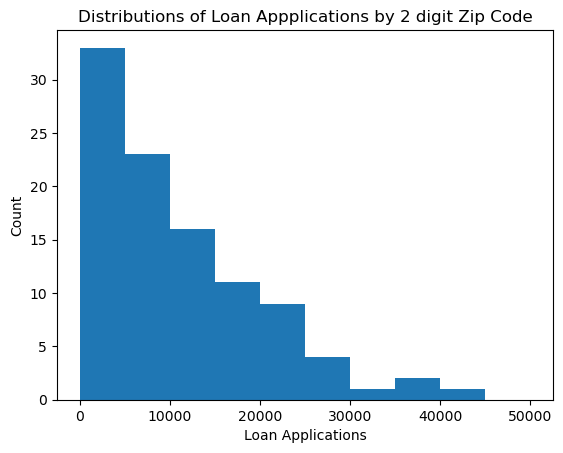

In [41]:
# Plotting Histogram
plt.hist(df_macro_count, bins = np.arange(0, 55000, 5000))
plt.xlabel("Loan Applications")
plt.ylabel("Count")
plt.title("Distributions of Loan Appplications by 2 digit Zip Code")
plt.show()

# Custom Scaling to a DataFrame based on observations in the same 2 digit Zip Code.

In [42]:
def cust_scaler(df_unscaled, zip_mean, zip_std):
    
    scaled_df = []
    
    #Iterate over unique zip codes
    for code in df_unscaled['zip_2'].unique():
        
        #Select records with the current zipcode
        df_local_zip = df_unscaled[df_unscaled['zip_2'] == code].copy()
        
        #Scaling each feature for the current zip code
        for col in zip_mean.columns:
            df_local_zip[col] = (df_local_zip[col] - zip_mean.loc[code, col]) / zip_std.loc[code, col]
            
        scaled_df.append(df_local_zip)
        
    #Concatenate sacaled df
    df_scaled = pd.concat(scaled_df)
    
    return df_scaled

#Applying custom scaling to training data
df_train_scaled = cust_scaler(df_unscaled = numerical_df, zip_mean = df_macro_mean, zip_std = df_macro_std)

df_train_scaled.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,zip_3,zip_2,credit_history,credit_line_ratio,balance_annual_income,fico_avg_score,installment_amnt_ratio
0,-0.608872,0.164693,-0.163457,-0.325463,1.122052,0.447071,-0.429185,-1.307963,0,-0.284092,-1.473992,0,-0.546784,-1.023435,-0.312566,0,190,19,-0.507738,0.163442,-1.289327,-0.664438,0.751798
67,1.642269,1.571844,-1.681827,-1.852288,-1.097898,2.003534,0.922524,-1.307963,1,-1.129831,0.315839,0,0.051569,1.656392,0.185487,0,197,19,1.811497,-0.290346,0.013519,-1.142713,-0.953725
109,-0.608872,0.164693,-0.163457,-0.325463,-1.097898,-1.109391,0.373296,1.107810,0,-0.284092,0.504437,0,-0.039984,1.171393,-0.810619,0,197,19,-0.405765,-0.661155,-1.119129,-0.505013,0.751305
166,-0.608872,0.045809,-0.163457,-0.172780,-1.375392,-1.109391,-1.966736,1.107810,0,-0.284092,1.057904,0,-0.491274,-0.982334,-0.810619,0,191,19,-1.030678,0.453866,-0.581365,0.451536,0.690353
240,-0.608872,0.350584,-0.163457,-0.478145,-1.097898,-1.109391,-0.044315,1.107810,0,-0.706962,1.628628,0,-0.101400,0.123301,-0.810619,0,191,19,0.015201,-0.203410,-1.206653,-0.823863,0.847883


# Loading the test dataset.

In [43]:
df_test = pd.read_csv(df_test_path, low_memory = False)

# Drop Leak Columns

In [44]:
df_test = df_test.drop(columns = column_drop, axis = 1) #dropping columns with potential data leakage
df_test = df_test.drop(columns = single_value_cols) # drops columns with single unique value
df_test = df_test.drop(columns = drop_columns) # drops specified columns

### Transform Categorical features to numerical.

In [45]:
df_test_numeric = convert_object_to_numeric(df_test)

#Applying custom scaling
df_test_scaled = cust_scaler(df_test_numeric, zip_mean = df_macro_mean, zip_std = df_macro_std)

### Columns to Drop.

In [46]:
cols_to_drop = ['zip_3' , 'zip_2']

#Drop specified columns from both DataFrames
df_test_scaled = df_test_scaled.drop(columns = cols_to_drop, errors = 'ignore')
df_train_scaled = df_train_scaled.drop(columns = cols_to_drop, errors = 'ignore')

### Finds columns present in df_train_scaled but not in df_test_scaled.

In [47]:
different_columns = [col for col in df_train_scaled.columns if col not in df_test_scaled.columns]
different_columns

[]

In [48]:
df_train_scaled.shape, df_test_scaled.shape

((1073090, 21), (194208, 21))

### Checks for null values in df_train_scaled.

In [49]:
null_counts = pd.Series(df_train_scaled.isnull().sum(), name = "Null Count")
null_counts

term                      0
int_rate                  0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dti                       0
pub_rec                   0
revol_bal                 0
revol_util                0
mort_acc                  0
pub_rec_bankruptcies      0
credit_history            0
credit_line_ratio         0
balance_annual_income     0
fico_avg_score            0
installment_amnt_ratio    0
Name: Null Count, dtype: int64

# Deep Copy in a zip file.

In [50]:
#Saved as compressed zip files to save space
df_train_scaled.to_csv("/Users/rolex/Desktop/IGP/Project/Data/df_train_scaled.csv.zip")
df_test_scaled.to_csv("/Users/rolex/Desktop/IGP/Project/Data/df_test_scaled.csv.zip")

# Response Variable.

In [51]:
df1 = df_train_scaled

In [52]:
# Convert loan_status to categorical
df1['loan_status'] = df1['loan_status'].apply(lambda x: 0 if x < 0.5 else 1)

# Now filter based on loan_status == 0 and loan_status == 1
df_paid = df1[df1['loan_status'] == 0]
df_default = df1[df1['loan_status'] == 1]

## Get continuous response variables.

In [53]:
cont_cols = [col for col in df1.columns if len(df1[col].value_counts()) > 10]
cont_cols

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'purpose',
 'dti',
 'revol_bal',
 'revol_util',
 'mort_acc',
 'credit_history',
 'credit_line_ratio',
 'balance_annual_income',
 'fico_avg_score',
 'installment_amnt_ratio']

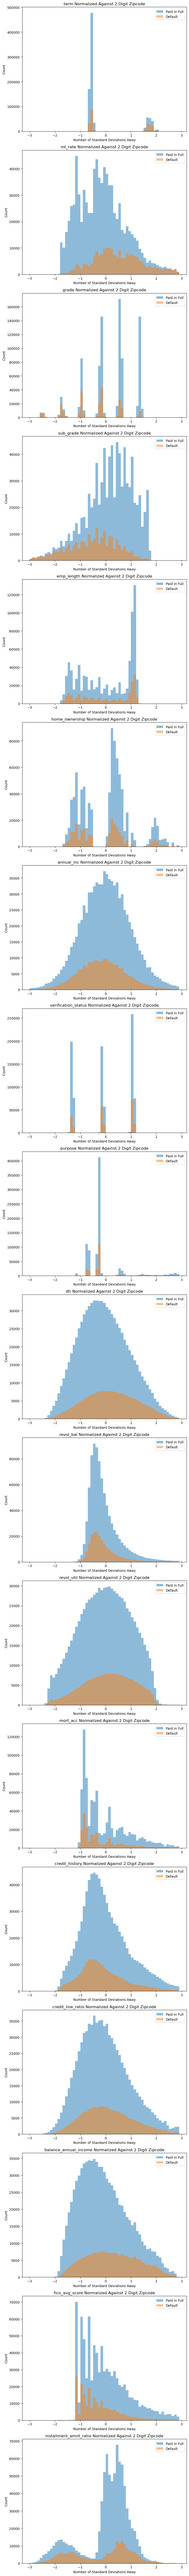

In [54]:
fig, axes = plt.subplots(len(cont_cols), 1, figsize=(8, 6*len(cont_cols)))

for i, c in enumerate(cont_cols):
    axes[i].hist(df_paid[c], bins=np.arange(-3, 3, 0.1), label='Paid in Full', alpha=0.5)
    axes[i].hist(df_default[c], bins=np.arange(-3, 3, 0.1), label='Default', alpha=0.5)
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel("Number of Standard Deviations Away")
    axes[i].set_title("{} Normalized Against 2 Digit Zipcode".format(c))
    axes[i].legend()

plt.tight_layout()
plt.show()


# Report using the Sweetviz library to analyze

In [59]:
merged_df = pd.concat([df, numerical_df['credit_history']], axis=1)


columns_to_visualize = [
    'funded_amnt_inv', 'term', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
    'verification_status', 'purpose', 'dti', 'fico_range_high', 'mths_since_last_delinq', 'total_acc',
    'initial_list_status', 'last_fico_range_high', 'collections_12_mths_ex_med', 'total_rev_hi_lim',
    'acc_open_past_24mths', 'bc_open_to_buy', 'mo_sin_old_il_acct', 'mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_il_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
    'num_sats', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_il_high_credit_limit',
    '90day_worse_rating', 'credit_history'
]

# Sweetviz report
report = sv.analyze(merged_df[columns_to_visualize])

report.show_html('indiv_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report indiv_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
